# IBM Machine Learning
## Deep Learning and Reinforcement Learning
### Final Project

In [1]:
import datetime
import keras
from keras.datasets import fashion_mnist as mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [2]:
now = datetime.datetime.now

In [3]:
# parameters
batch_size = 128
num_classes = 5
epochs = 5
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

In [5]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

In [7]:
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

In [8]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [9]:
np.unique(y_train, 
          return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [10]:
np.unique(y_test, 
          return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [11]:
x_train[555].shape

(28, 28)

0


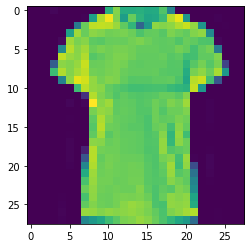

In [12]:
print(y_train[66])
plt.imshow(x_train[66])

In [13]:
model = Sequential(feature_layers + classification_layers)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [15]:
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 [==============================] - 31s 132ms/step - loss: 1.6022 - accuracy: 0.2163 - val_loss: 1.5772 - val_accuracy: 0.2994
Epoch 2/5
235/235 [==============================] - 33s 139ms/step - loss: 1.5672 - accuracy: 0.3041 - val_loss: 1.5378 - val_accuracy: 0.4836
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 1.5295 - accuracy: 0.3961 - val_loss: 1.4947 - val_accuracy: 0.5960
Epoch 4/5
235/235 [==============================] - 30s 127ms/step - loss: 1.4883 - accuracy: 0.4601 - val_loss: 1.4471 - val_accuracy: 0.6530
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 1.4407 - accuracy: 0.5123 - val_loss: 1.3923 - val_accuracy: 0.6762
Training time: 0:02:35.210702
Test score: 1.3922995328903198
Test accuracy: 0.6761999726295471


In [16]:
for l in feature_layers:
    l.trainable = False

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [18]:
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 [==============================] - 9s 40ms/step - loss: 1.6823 - accuracy: 0.1939 - val_loss: 1.6368 - val_accuracy: 0.2104
Epoch 2/5
235/235 [==============================] - 9s 39ms/step - loss: 1.6199 - accuracy: 0.2249 - val_loss: 1.5788 - val_accuracy: 0.3712
Epoch 3/5
235/235 [==============================] - 9s 40ms/step - loss: 1.5698 - accuracy: 0.2984 - val_loss: 1.5289 - val_accuracy: 0.4288
Epoch 4/5
235/235 [==============================] - 9s 40ms/step - loss: 1.5273 - accuracy: 0.3661 - val_loss: 1.4892 - val_accuracy: 0.4862
Epoch 5/5
235/235 [==============================] - 9s 39ms/step - loss: 1.4923 - accuracy: 0.4151 - val_loss: 1.4555 - val_accuracy: 0.5650
Training time: 0:00:47.084197
Test score: 1.4555386304855347
Test accuracy: 0.5649999976158142


In [19]:
feature_layers2 = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers2 = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]
model2 = Sequential(feature_layers2 + classification_layers2)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [20]:
train_model(model2,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 [==============================] - 28s 121ms/step - loss: 1.5849 - accuracy: 0.2523 - val_loss: 1.5467 - val_accuracy: 0.3128
Epoch 2/5
235/235 [==============================] - 28s 118ms/step - loss: 1.5406 - accuracy: 0.3210 - val_loss: 1.4959 - val_accuracy: 0.6178
Epoch 3/5
235/235 [==============================] - 28s 118ms/step - loss: 1.4957 - accuracy: 0.3909 - val_loss: 1.4438 - val_accuracy: 0.6824
Epoch 4/5
235/235 [==============================] - 28s 117ms/step - loss: 1.4466 - accuracy: 0.4505 - val_loss: 1.3907 - val_accuracy: 0.6902
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 1.4003 - accuracy: 0.4896 - val_loss: 1.3344 - val_accuracy: 0.6938
Training time: 0:02:20.771792
Test score: 1.334423303604126
Test accuracy: 0.6937999725341797


In [21]:
for l in feature_layers2:
    l.trainable = False

In [22]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [23]:
train_model(model2,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples
Epoch 1/5
235/235 [==============================] - 9s 40ms/step - loss: 1.6716 - accuracy: 0.2120 - val_loss: 1.6148 - val_accuracy: 0.3018
Epoch 2/5
235/235 [==============================] - 9s 39ms/step - loss: 1.5941 - accuracy: 0.2719 - val_loss: 1.5374 - val_accuracy: 0.3644
Epoch 3/5
235/235 [==============================] - 9s 39ms/step - loss: 1.5271 - accuracy: 0.3399 - val_loss: 1.4711 - val_accuracy: 0.4854
Epoch 4/5
235/235 [==============================] - 9s 40ms/step - loss: 1.4694 - accuracy: 0.4123 - val_loss: 1.4125 - val_accuracy: 0.6242
Epoch 5/5
235/235 [==============================] - 9s 40ms/step - loss: 1.4168 - accuracy: 0.4780 - val_loss: 1.3593 - val_accuracy: 0.6924
Training time: 0:00:47.355452
Test score: 1.3593109846115112
Test accuracy: 0.6923999786376953
